# BH weights accuracy on more noise levels and on COSMOS images
---
### (only for padded images)

## Contents
---

1. [Data Preparation](#1-Data-Preparation)
1. [Visualization](#2-Visualization)
1. [COSMOS images results](#3-COSMOS-images-results)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

"""Check the folders hierarchy"""
from os.path import expanduser
user_home = expanduser("~")
path = user_home+'/Cosmostat/Codes/BlendHunter'

"""Import functions from annex"""
from annex_new import import_
from annex_new import get_bh_results
from annex_new import get_sep_results

from annex_new import get_mean_acc
from annex_new import get_acc_bh
from annex_new import get_acc_sep

# 1 Data Preparation

In [9]:
""""Retrieve overall results for padded images """
bh_pad_results = get_bh_results(path_bh_results = path+'/bh_pad_results', pad_images=True)
sep_pad_results = get_sep_results(path_sep_results = path+'/sep_pad_results', pad_images=True)

"""Retrieve accuracies for sep and bh"""
bh_acc_pad = [[get_acc_bh(results=bh_pad_results[i][j], path= path) for j in range(len(bh_pad_results[i]))] for i in range(len(bh_pad_results))]

sep_acc_pad = [[get_acc_sep(results=sep_pad_results[i][j]) for j in range(len(sep_pad_results[i]))] for i in range(len(sep_pad_results))]

"""Compute mean accuracy for each noise level and standard deviation for error bars"""
mean_acc_bh_pad = [np.mean(bh_acc_pad[i]) for i in range(len(bh_acc_pad))]
mean_acc_sep_pad = [np.mean(sep_acc_pad[i]) for i in range(len(sep_acc_pad))]

std_bh_pad = [round(np.std(bh_acc_pad[i]), 3) for i in range(len(bh_acc_pad))]
std_sep_pad = [round(np.std(sep_acc_pad[i]), 3) for i in range(len(sep_acc_pad))]

In [ ]:
"""Retrieve results of weights tested on different noise levels"""

"""Load weights accuracy results"""
def load_weights_accuracy(input_path= None, sigma_value=None):
    acc = np.load(input_path+'/acc_weights{}.npy'.format(sigma_value), allow_pickle=True).item()
    return acc

"""Create comprehensive dictionary of results"""
def create_dict(input_path, sigma=None):
    dict_ = dict()
    for i in sigma:
        weights_acc = load_weights_accuracy(input_path, sigma_value=i)
        #Save dict in the dict
        dict_.update({'Weights'+str(i): weights_acc})
    return dict_

sigmas = [5,14,18,26,35,40]
noise_realisation = ['',1,2,3,4]
datasets = [str(j)+str(i) for j in sigmas for i in noise_realisation]

"""Create our dictionary"""
bh_results_dict = create_dict(input_path=path+'/bh_pad_results', sigma = datasets)


"""Compute mean accuracy for each noise level"""

sigmas = [5,14,18,26,35,40]
noise_realisation = ['',1,2,3,4]
datasets_bis = [[str(j)+str(i) for i in noise_realisation ] for j in sigmas]

n_ = [3,5,7,10,12,14,16,18,20,22,24,26,28,30,32,35,37,40,42,44]

mean_acc_weights =[[np.mean([bh_results_dict['Weights'+str(i)]['Path'+str(j)]['Accuracy'] for i in datasets_bis[k]]) for k in range(len(datasets_bis))] for j in n_]
std_acc_weights =[[np.std([bh_results_dict['Weights'+str(i)]['Path'+str(j)]['Accuracy'] for i in datasets_bis[k]]) for k in range(len(datasets_bis))] for j in n_]

# 2 Visualization

/Users/alacan/miniconda3/envs/deblending/lib/python3.7/site-packages/ipykernel_launcher.py:63: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


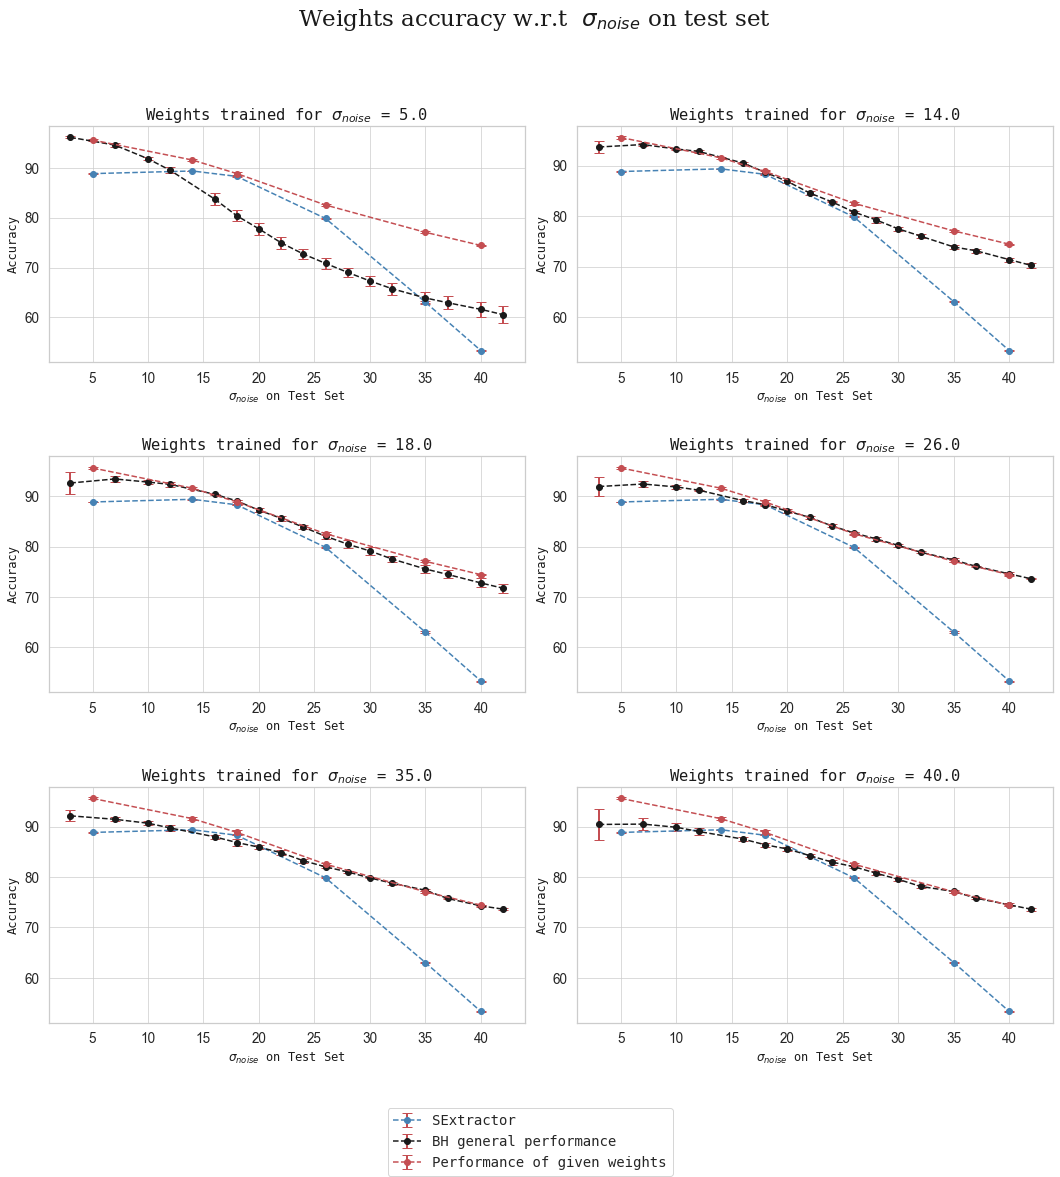

In [21]:
import matplotlib
matplotlib.rcParams.update({'errorbar.capsize': 5})

"""SExtractor was not tested on the additional datasets, 
   comparison is only made with results on the 6 original noise levels"""
sigma_values_ = [5.0, 14.0, 18.0, 26.0, 35.0, 40.0]
sigma_values_bh = [3,5,7,10, 12,14, 16,18,20,22,24,26,28,30,32,35,37,40,42,44]

#Seaborn theme
sns.set(context='notebook', style='whitegrid', palette='deep')
#Font dictionnary
font = {'family': 'monospace','color':  'k', 'weight': 'normal','size': 12}
#Start plot
fig, ax = plt.subplots(3,2,figsize=(18,16.5), sharex=False)
fig.subplots_adjust(hspace = .2, wspace=.11)
#Title
fig.suptitle('Weights accuracy w.r.t  $\sigma_{noise}$ on test set', 
             fontdict = {'family': 'serif','color':  'k','weight': 'heavy','size': 23}, fontsize=23)
#First subplot 
ax[0,0].set_title('Weights trained for $\sigma_{noise}$ = 5.0', fontdict=font, fontsize=15.5)
ax[0,0].errorbar(sigma_values_, mean_acc_sep_pad, yerr=std_sep_pad, ecolor='r', color ='steelblue', ls='--', lw=1.5,fmt='--o',elinewidth=2, label='SExtractor overall performance' )
ax[0,0].errorbar(sigma_values_bh, mean_acc_weights[0], yerr=std_acc_weights[0], ecolor='r', color ='k', ls='--', lw=1.5,fmt='--o',elinewidth=2, label='Given weights performance' )
ax[0,0].errorbar(sigma_values_, mean_acc_bh_pad, yerr=std_bh_pad, ecolor='r', color ='r', ls='--', lw=1.5,fmt='--o',elinewidth=2, label='BH overall performance' )
ax[0,0].set_ylabel('Accuracy', fontdict = font)
ax[0,0].set_xlabel('$\sigma_{noise}$ on Test Set', fontdict = font)
ax[0,0].tick_params(axis='both',  which='both', labelsize=13.5, grid_alpha=0.7)
ax[0,0].legend(loc = 'lower left', prop={'family': 'monospace','size': 16})
#Second subplot 
ax[0,1].set_title('Weights trained for $\sigma_{noise}$ = 14.0', fontdict=font, fontsize=15.5)
ax[0,1].errorbar(sigma_values_, mean_acc_sep_pad, yerr=std_sep_pad, ecolor='r', color ='steelblue', ls='--', lw=1.5,fmt='--o',elinewidth=2, label='SExtractor overall performance' )
ax[0,1].errorbar(sigma_values_bh, mean_acc_weights[1], yerr=std_acc_weights[1], ecolor='r', color ='k', ls='--', lw=1.5,fmt='--o',elinewidth=2, label='Given weights performance' )
ax[0,1].errorbar(sigma_values_, mean_acc_bh_pad, yerr=std_bh_pad, ecolor='r', color ='r', ls='--', lw=1.5,fmt='--o',elinewidth=2, label='BH overall performance' )
ax[0,1].set_ylabel('Accuracy', fontdict = font)
ax[0,1].set_xlabel('$\sigma_{noise}$ on Test Set', fontdict = font)
ax[0,1].tick_params(axis='both',  which='both', labelsize=13.5, grid_alpha=0.7)
ax[0,1].legend(loc = 'lower left', prop={'family': 'monospace','size': 16})
#3rd subplot 
ax[1,0].set_title('Weights trained for $\sigma_{noise}$ = 18.0', fontdict=font, fontsize=15.5)
ax[1,0].errorbar(sigma_values_, mean_acc_sep_pad, yerr=std_sep_pad, ecolor='r', color ='steelblue', ls='--', lw=1.5,fmt='--o',elinewidth=2, label='SExtractor overall performance' )
ax[1,0].errorbar(sigma_values_bh, mean_acc_weights[2], yerr=std_acc_weights[2], ecolor='r', color ='k', ls='--', lw=1.5,fmt='--o',elinewidth=2, label='Given weights performance' )
ax[1,0].errorbar(sigma_values_, mean_acc_bh_pad, yerr=std_bh_pad, ecolor='r', color ='r', ls='--', lw=1.5,fmt='--o',elinewidth=2, label='BH overall performance' )
ax[1,0].set_ylabel('Accuracy', fontdict = font)
ax[1,0].set_xlabel('$\sigma_{noise}$ on Test Set', fontdict = font)
ax[1,0].tick_params(axis='both', which='both', labelsize=13.5, grid_alpha=0.7)
ax[1,0].legend(loc = 'lower left', prop={'family': 'monospace','size': 16})
#4th subplot 
ax[1,1].set_title('Weights trained for $\sigma_{noise}$ = 26.0', fontdict=font, fontsize=15.5)
ax[1,1].errorbar(sigma_values_, mean_acc_sep_pad, yerr=std_sep_pad, ecolor='r', color ='steelblue', ls='--', lw=1.5,fmt='--o',elinewidth=2, label='SExtractor overall performance' )
ax[1,1].errorbar(sigma_values_bh, mean_acc_weights[3], yerr=std_acc_weights[3], ecolor='r', color ='k', ls='--', lw=1.5,fmt='--o',elinewidth=2, label='Given weights performance' )
ax[1,1].errorbar(sigma_values_, mean_acc_bh_pad, yerr=std_bh_pad, ecolor='r', color ='r', ls='--', lw=1.5,fmt='--o',elinewidth=2, label='BH overall performance' )
ax[1,1].set_ylabel('Accuracy', fontdict = font)
ax[1,1].set_xlabel('$\sigma_{noise}$ on Test Set', fontdict = font)
ax[1,1].tick_params(axis='both',  which='both', labelsize=13.5, grid_alpha=0.7)
ax[1,1].legend(loc = 'lower left', prop={'family': 'monospace','size': 16})
#5th subplot 
ax[2,0].set_title('Weights trained for $\sigma_{noise}$ = 35.0', fontdict=font, fontsize=15.5)
ax[2,0].errorbar(sigma_values_, mean_acc_sep_pad, yerr=std_sep_pad, ecolor='r', color ='steelblue', ls='--', lw=1.5,fmt='--o',elinewidth=2, label='SExtractor overall performance' )
ax[2,0].errorbar(sigma_values_bh, mean_acc_weights[4], yerr=std_acc_weights[4], ecolor='r', color ='k', ls='--', lw=1.5,fmt='--o',elinewidth=2, label='Given weights performance' )
ax[2,0].errorbar(sigma_values_, mean_acc_bh_pad, yerr=std_bh_pad, ecolor='r', color ='r', ls='--', lw=1.5,fmt='--o',elinewidth=2, label='BH overall performance' )
ax[2,0].set_ylabel('Accuracy', fontdict = font)
ax[2,0].set_xlabel('$\sigma_{noise}$ on Test Set', fontdict = font)
ax[2,0].tick_params(axis='both',  which='both', labelsize=13.5, grid_alpha=0.7)
ax[2,0].legend(loc = 'lower left', prop={'family': 'monospace','size': 16})
#6th subplot 
ax[2,1].set_title('Weights trained for $\sigma_{noise}$ = 40.0', fontdict=font, fontsize=15.5)
ax[2,1].errorbar(sigma_values_, mean_acc_sep_pad, yerr=std_sep_pad, ecolor='r', color ='steelblue', ls='--', lw=1.5,fmt='--o',elinewidth=2, label='SExtractor overall performance' )
ax[2,1].errorbar(sigma_values_bh, mean_acc_weights[5], yerr=std_acc_weights[5], ecolor='r', color ='k', ls='--', lw=1.5,fmt='--o',elinewidth=2, label='Given weights performance' )
ax[2,1].errorbar(sigma_values_, mean_acc_bh_pad, yerr=std_bh_pad, ecolor='r', color ='r', ls='--', lw=1.5,fmt='--o',elinewidth=2, label='BH overall performance' )
ax[2,1].set_xlabel('$\sigma_{noise}$ on Test Set', fontdict = font)
ax[2,1].set_ylabel('Accuracy', fontdict = font)
ax[2,1].tick_params(axis='both',  which='both', labelsize=13.5, grid_alpha=0.7)
ax[2,1].legend(loc = 'lower left', prop={'family': 'monospace','size': 16})

#Adjust
plt.subplots_adjust(hspace=0.4)
plt.show()

# 3 COSMOS images results

In [ ]:
"""Retrieve results on cosmos images"""
def cosmos_results(path = None, pad_images=False):
    sigmas = [5,14,18,26,35,40]
    noise_realisation = ['',1,2,3,4]
    datasets = [[str(j)+str(i) for i in noise_realisation]  for j in sigmas]
    
    """Get results for padded images"""
    """Check folder hierarchy"""
    if pad_images:
        return [[import_(path+'/bh_real_pad/preds_real_data{}.npy'.format(i)) for i in datasets[j]] for j in range(len(datasets))]
    
    else:
        return [[import_(path+'/bh_real/preds_real_data{}.npy'.format(i)) for i in datasets[j]] for j in range(len(datasets))]

    
cosmos_results_bh = cosmos_results_bh(path=path, pad_images=True)    
cosmos_results_sep = np.load(path+'/sep_pad_results/flags_real_pad.npy', allow_pickle=True)


"""Retrieve accuracies for sep and bh"""
bh_acc_cosmos = [[get_acc_bh(results=cosmos_results_bh[i][j], path= path) for j in range(len(cosmos_results_bh[i]))] for i in range(len(cosmos_results_bh))]
sep_acc_cosmos = get_acc_sep(results=cosmos_results_sep)

"""Compute mean accuracy for each noise level and standard deviation for error bars"""
mean_acc_bh_cosmos = [np.mean(bh_acc_cosmos[i]) for i in range(len(bh_acc_cosmos))]
std_bh_cosmos = [round(np.std(bh_acc_cosmos[i]), 3) for i in range(len(bh_acc_cosmos))]
    

### Plot

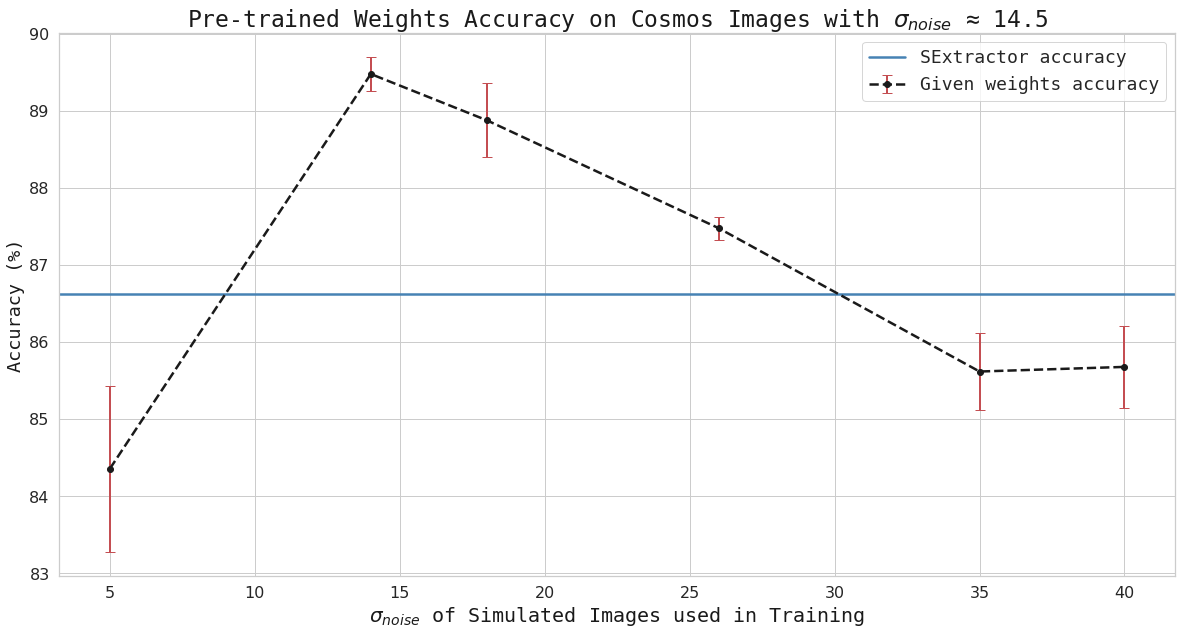

In [15]:
import matplotlib
matplotlib.rcParams.update({'errorbar.capsize': 5})
sigmas = [5.0, 14.0, 18.0, 26.0, 35.0, 40.0]

#Seaborn theme
sns.set(context='notebook', style='whitegrid', palette='deep')
font = {'family': 'monospace','color':  'k', 'weight': 'normal','size': 18}

fig = plt.figure(figsize=(20,10))
plt.title('Pre-trained Weights Accuracy on Cosmos Images with $\sigma_{noise}$ ≈ 14.5',fontdict=font, fontsize=23)
plt.errorbar(sigmas, mean_acc_bh_cosmos, yerr = std_bh_cosmos , ecolor='r', elinewidth=2, color='k', marker='o', ls='--', lw=2.5, label='Given weights accuracy')
"""Sep single results on real images"""
plt.axhline(sep_acc_cosmos , linestyle='-', color = 'steelblue', lw=2.5, label= 'SExtractor accuracy')
plt.xlabel('$\sigma_{noise}$ of Simulated Images used in Training', fontsize=20, fontdict=font)
plt.ylabel('Accuracy', fontsize=18.5, fontdict=font)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.legend(loc='upper right', prop = {'family': 'monospace','size': 18})
plt.show()